Before you can train a model on a dataset, it needs to be preprocessed into the expected model input format. Whether your data is text, images, or audio, they need to be converted and assembled into batches of tensors. 🤗 Transformers provides a set of preprocessing classes to help prepare your data for the model. In this tutorial, you’ll learn that for:

Text, use a Tokenizer to convert text into a sequence of tokens, create a numerical representation of the tokens, and assemble them into tensors.

Speech and audio, use a Feature extractor to extract sequential features from audio waveforms and convert them into tensors.

Image inputs use a ImageProcessor to convert images into tensors.

Multimodal inputs, use a Processor to combine a tokenizer and a feature extractor or image processor.



In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00


In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [2]:
encoded_input = tokenizer("Do not meddle in the affairs of wizards, for they are subtle and quick to anger.")
print(encoded_input)

{'input_ids': [101, 2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [3]:
tokenizer.decode(encoded_input["input_ids"])

'[CLS] Do not meddle in the affairs of wizards, for they are subtle and quick to anger. [SEP]'

 Pad

Sentences aren’t always the same length which can be an issue because tensors, the model inputs, need to have a uniform shape. Padding is a strategy for ensuring tensors are rectangular by adding a special padding token to shorter sentences.

Set the padding parameter to True to pad the shorter sequences in the batch to match the longest sequence:


In [5]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True)
print(encoded_input)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


 Truncation

On the other end of the spectrum, sometimes a sequence may be too long for a model to handle. In this case, you’ll need to truncate the sequence to a shorter length.

Set the truncation parameter to True to truncate a sequence to the maximum length accepted by the model:

In [6]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True, truncation=True)
print(encoded_input)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


Build tensors

Finally, you want the tokenizer to return the actual tensors that get fed to the model.

Set the return_tensors parameter to either pt for PyTorch, or tf for TensorFlow:
Pytorch

In [7]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_input)

{'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


Audio

For audio tasks, you’ll need a feature extractor to prepare your dataset for the model. The feature extractor is designed to extract features from raw audio data, and convert them into tensors.

Load the MInDS-14 dataset (see the 🤗 Datasets tutorial for more details on how to load a dataset) to see how you can use a feature extractor with audio datasets:

In [9]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00


In [10]:
from datasets import load_dataset, Audio

dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")

Generating train split:   0%|          | 0/563 [00:00<?, ? examples/s]

In [12]:
dataset[0]["audio"]

{'path': '602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

In [15]:
sound_file = dataset[0]["audio"]
sound_file

{'path': '602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

In [26]:
import numpy as np
a = sound_file['array']
print(a)
b = np.array(a)
print(b)

[ 0.          0.00024414 -0.00024414 ... -0.00024414  0.
  0.        ]
[ 0.          0.00024414 -0.00024414 ... -0.00024414  0.
  0.        ]


In [24]:
from IPython.display import Audio, display
display(Audio(b, autoplay=True))

ValueError: ignored

In [28]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:381: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [29]:
audio_input = [dataset[0]["audio"]["array"]]
feature_extractor(audio_input, sampling_rate=16000)

{'input_values': [array([ 9.4472744e-05,  3.0777880e-03, -2.8888427e-03, ...,
       -2.8888427e-03,  9.4472744e-05,  9.4472744e-05], dtype=float32)]}

In [30]:
dataset[0]["audio"]["array"].shape

dataset[1]["audio"]["array"].shape

(53248,)

In [31]:
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=16000,
        padding=True,
        max_length=100000,
        truncation=True,
    )
    return inputs

In [32]:
processed_dataset = preprocess_function(dataset[:5])

In [33]:
processed_dataset["input_values"][0].shape

processed_dataset["input_values"][1].shape

(100000,)

Computer vision

For computer vision tasks, you’ll need an image processor to prepare your dataset for the model. Image preprocessing consists of several steps that convert images into the input expected by the model. These steps include but are not limited to resizing, normalizing, color channel correction, and converting images to tensors.

Image preprocessing often follows some form of image augmentation. Both image preprocessing and image augmentation transform image data, but they serve different purposes:

  Image augmentation alters images in a way that can help prevent overfitting and increase the robustness of the model. You can get creative in how you augment your data - adjust brightness and colors, crop, rotate, resize, zoom, etc. However, be mindful not to change the meaning of the images with your augmentations.
  
  Image preprocessing guarantees that the images match the model’s expected input format. When fine-tuning a computer vision model, images must be preprocessed exactly as when the model was initially trained.

You can use any library you like for image augmentation. For image preprocessing, use the ImageProcessor associated with the model.

In [34]:
from datasets import load_dataset

dataset = load_dataset("food101", split="train[:100]")

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

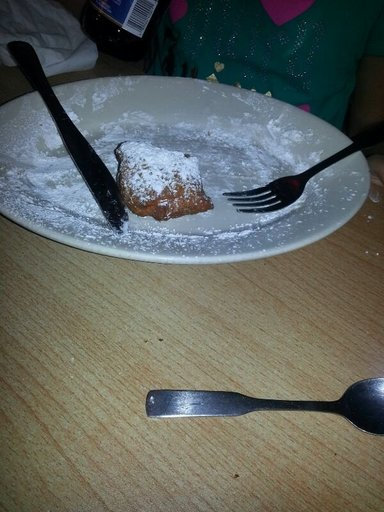

In [35]:
dataset[0]["image"]

In [36]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

In [37]:
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)

_transforms = Compose([RandomResizedCrop(size), ColorJitter(brightness=0.5, hue=0.5)])

In [38]:
def transforms(examples):
    images = [_transforms(img.convert("RGB")) for img in examples["image"]]
    examples["pixel_values"] = image_processor(images, do_resize=False, return_tensors="pt")["pixel_values"]
    return examples

In [39]:
dataset.set_transform(transforms)

In [40]:
dataset[0].keys()

dict_keys(['image', 'label', 'pixel_values'])

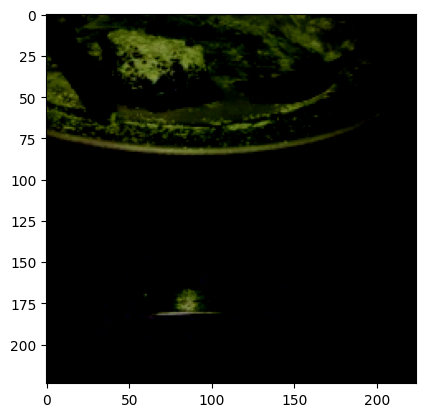

In [41]:
import numpy as np
import matplotlib.pyplot as plt

img = dataset[0]["pixel_values"]
plt.imshow(img.permute(1, 2, 0))